Bayes' theorem

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

since:
$P(B) = P(B|A)P(A) + P(B|\neg A)P(\neg A)$

then:
$P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\neg A)P(\neg A)}$

In [1]:
using Random, Distributions
using Plots
using IJulia
using Compat.Printf

In [2]:
# https://en.m.wikipedia.org/wiki/Precision_and_recall
# contingency table or confusion matrix
function ratios(X, Y, θ)
    y = X.>θ
    tp = (y .== Y) .& (y .== true)
    TP = sum(tp)
    fp = (y .!= Y) .& (y .== true)
    FP = sum(fp)
    tn = (y .== Y) .& (y .== false)
    TN = sum(tn)
    fn = (y .!= Y) .& (y .== false)
    FN = sum(fn)
    PPV = TP/(TP+FP) # Positive predictive value (PPV), Precision
    FDR = FP/(TP+FP) # False discovery rate (FDR)
    FOR = FN/(TN+FP) # False omission rate (FOR)
    NPV = TN/(TN+FP) # Negative predictive value (NPV)
    TPR = TP/(TP+FN) # True positive rate, sensitivity, recall
    FPR = FP/(TN+FP) # False positive rate, Fall-out
    FNR = FN/(TP+FN) # False negative rate (FNR), Miss rate
    TNR = TN/(TN+FP) # Specificity (SPC), Selectivity, True negative rate (TNR)
    @printf "TPR: %0.2f\n" TPR
    @printf "FPR: %0.2f\n" FPR
    @printf "FNR: %0.2f\n" FNR
    @printf "TNR: %0.2f\n" TNR
    return PPV, FDR, FOR, NPV, TPR, FPR, FNR, TNR
end

ratios (generic function with 1 method)

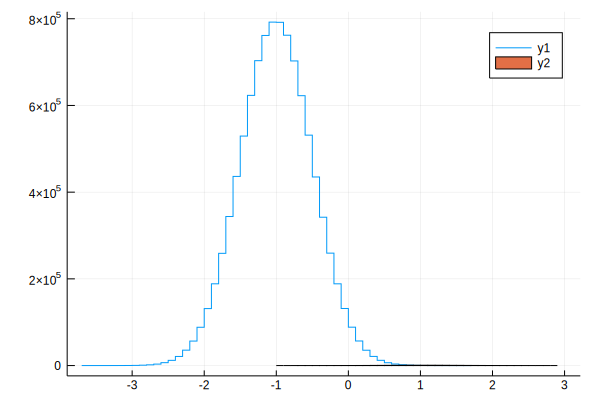

In [3]:
# dataset
# https://en.m.wikipedia.org/wiki/Classification_rule

N = 10000000
a1 = 0.001
a0 = 1 - a1
n0 = Int(a0*N)
n1 = N-n0
x0 = rand(Normal(-1.0,.50), n0)
x1 = rand(Normal(1.0,.50), n1)
X = vcat(x0, x1)
Y = vcat(falses(n0),trues(n1))

histogram([x0,x1], nbin=50)

In [4]:
PPV, FDR, FOR, NPV, TPR, FPR, FNR, TNR = ratios(X, Y, -0.2)

TPR: 0.99
FPR: 0.05
FNR: 0.01
TNR: 0.95


(0.017816652794121868, 0.9821833472058781, 6.806806806806807e-6, 0.9451927927927928, 0.9932, 0.054807207207207206, 0.0068, 0.9451927927927928)

In [5]:
PB_A = TPR
PA = a1
@printf "PB_A*PA: %fx%f\n" PB_A PA
PB = TPR*a1 + FPR*a0
@printf "PB: %f = %fx%f + %fx%f\n" PB TPR a1 FPR a0

# P(A|B)=P(B|A)P(A)/P(B)
PA_B = PB_A*PA/PB
@printf "PA_B: %f\n" PA_B

PB_A*PA: 0.993200x0.001000
PB: 0.055746 = 0.993200x0.001000 + 0.054807x0.999000
PA_B: 0.017817


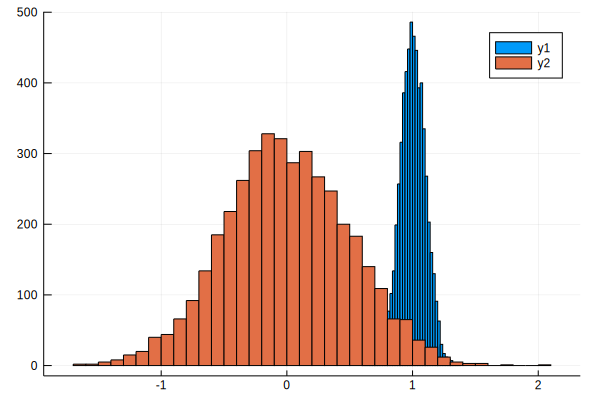

In [6]:
# https://it.wikipedia.org/wiki/Teorema_di_Bayes

# dataset
N = 10000
a1 = 0.4
a0 = 1 - a1
n0 = Int(a0*N)
n1 = N-n0
x0 = rand(Normal(1.0,.1), n0)
x1 = rand(Normal(0.0,0.5), n1)
# feature: >0 is trousers
X = vcat(x0, x1)
# label: 0:male, 1:female
Y = vcat(falses(n0),trues(n1))

# feature value distribution
histogram([x0,x1], nbin=50)

In [7]:
# want to classify male/female using 0.0 as feature threshold
# feature value <0 is not trousers
# feature value >0 is trousers
PPV, FDR, FOR, NPV, TPR, FPR, FNR, TNR = ratios(X, Y, 0.0)

TPR: 0.49
FPR: 1.00
FNR: 0.51
TNR: 0.00


(0.2456625597183807, 0.7543374402816193, 0.341, 0.0, 0.4885, 1.0, 0.5115, 0.0)

In [8]:
# A is female event
# B is trousers event

PB_A = TPR
PA = a1
@printf "PB_A*PA: %fx%f\n" PB_A PA
PB = TPR*a1 + FPR*a0
@printf "PB: %f = %fx%f + %fx%f\n" PB TPR a1 FPR a0

# P(A|B)=P(B|A)P(A)/P(B)
PA_B = PB_A*PA/PB
# this is the probability a person with trousers is female
@printf "PA_B: %f\n" PA_B

PB_A*PA: 0.488500x0.400000
PB: 0.795400 = 0.488500x0.400000 + 1.000000x0.600000
PA_B: 0.245663


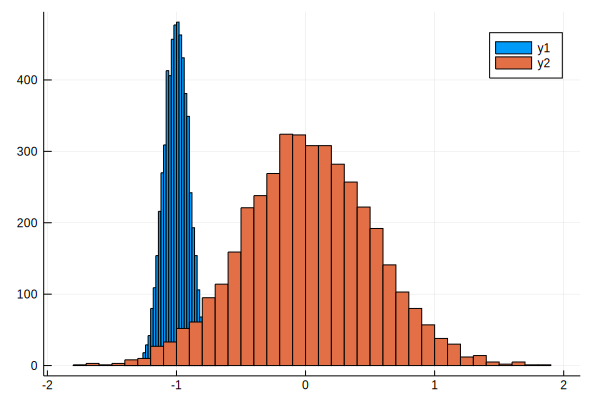

In [9]:
# dataset
N = 10000
a1 = 0.4
a0 = 1 - a1
n0 = Int(a0*N)
n1 = N-n0
x0 = rand(Normal(-1.0,.1), n0)
x1 = rand(Normal(0.0,0.5), n1)
# feature: >0 is trousers
X = vcat(x0, x1)
# label: 0:male, 1:female
Y = vcat(falses(n0),trues(n1))

# feature value distribution
histogram([x0,x1], nbin=50)

In [10]:
# want to classify male/female using 0.0 as feature threshold
# feature value <0 is trousers
# feature value >0 is not trousers
PPV, FDR, FOR, NPV, TPR, FPR, FNR, TNR = ratios(X, Y, 0.0)

TPR: 0.51
FPR: 0.00
FNR: 0.49
TNR: 1.00


(1.0, 0.0, 0.32366666666666666, 1.0, 0.5145, 0.0, 0.4855, 1.0)

In [11]:
# A is female event
# B is trousers event

PB_A = TPR
PA = a1
@printf "PB_A*PA: %fx%f\n" PB_A PA
PB = TPR*a1 + FPR*a0
@printf "PB: %f = %fx%f + %fx%f\n" PB TPR a1 FPR a0

# P(A|B)=P(B|A)P(A)/P(B)
PA_B = PB_A*PA/PB
# this is the probability a person with no trousers is female
# it equal to 1.0 since FPR = 0.0
@printf "PA_B: %f\n" PA_B

PB_A*PA: 0.514500x0.400000
PB: 0.205800 = 0.514500x0.400000 + 0.000000x0.600000
PA_B: 1.000000
